## 数组的计算     广播
- 我们在前一节中介绍了NumPy如何通过通用函数的向量化操作来减少缓慢的Python循环，

  另外一种向量化操作的方法是利用NumPy的广播功能。

  广播可以简单理解为用于不同大小数组的二进制通用函数（加、减、乘等）的一组规则



In [5]:
# 前面曾提到，对于同样大小的数组，二进制操作是对相应元素逐个计算
import numpy as np
np.random.seed(0)
x = np.arange(6).reshape((2,3))
y = np.random.randint(1,5,size=(2,3))
print(x)
print(y)
x+y

[[0 1 2]
 [3 4 5]]
[[1 4 2]
 [1 4 4]]


array([[1, 5, 4],
       [4, 8, 9]])

In [6]:
# 一个标量与一个数组相加，实际上是标量与数组的每一个数分别相加
import numpy as np
np.random.seed(0)
z = np.random.randint(5,9,size=(2,3))
print(z)
print(z+5)
# 我们可以认为这个操作是将数值5扩展或重复至数组[5, 5, 5]，然后执行加法

[[5 8 6]
 [5 8 8]]
[[10 13 11]
 [10 13 13]]


In [8]:
import numpy as np
a = np.array([1,2,3])
b = np.ones((3,3))
print(a)
print(b)
print(a+b)
# 这里这个一维数组就被扩展或者广播了。它沿着第二个维度扩展，扩展到匹配M数组的形状。

[1 2 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


In [12]:
import numpy as np
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)

print(a+b)

# 正如此前将一个值扩展或广播以匹配另外一个数组的形状，
# 这里将a和b都进行了扩展来匹配一个公共的形状，最终的结果是一个二维数组。

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


### 广播的规则
   - NumPy的广播遵循一组严格的规则，设定这组规则是为了决定两个数组间的操作。
    - 规则1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补1。
    - 规则2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另外一个数组的形状。
    - 规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常。

In [17]:
# 规则1
import numpy as np
x = np.arange(6).reshape((2,3))
y = np.arange(3)
print(x)
print(y)
print(y.shape)
print(x+y)

[[0 1 2]
 [3 4 5]]
[0 1 2]
(3,)
[[0 2 4]
 [3 5 7]]


In [21]:
# 规则二
import numpy as np
x = np.arange(3).reshape((3,1))
y = np.arange(3)
print(x)
print(y.shape)
print(x+y)

[[0]
 [1]
 [2]]
(3,)
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [28]:
# 规则三
import numpy as np
x = np.ones((3,2))
y = np.arange(3).reshape(3,1)
y.shape
# 根据规则一，y数组的形状会沿最左边补1
# y.shape  = (1,3) 即 y = [[0 1 3]]
# 而 根据规则二，x.shape = (3,2) 数组会沿着维度为1的方向匹配至另一数组的形状
# 即 y.shape = (3,3） 而 x.shape = (3,2) 不匹配所以会报错
print(x)
print(y)
print(x+y)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0]
 [1]
 [2]]
[[1. 1.]
 [2. 2.]
 [3. 3.]]


In [29]:
# 该函数计算log(exp(a) + exp(b))
import numpy as np

np.logaddexp(x,y)


array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## 广播的实际应用

    1. 数组的归一化
     在前面的一节中，我们看到通用函数让NumPy用户免于写很慢的Python循环。
     广播进一步扩展了这个功能，一个常见的例子就是数组数据的归一化。

In [33]:
import numpy as np
np.random.seed(1)
X = np.random.random((10,3))
# 计算每个特征的均值，计算方法是利用mean函数沿着第一个维度聚合：
Xmean = X.mean(0)
Xmean

array([0.43434437, 0.45032206, 0.42167713])

In [34]:
# 为了进一步核对我们的处理是否正确，可以查看归一化的数组的均值是否接近0
X_centered = X - Xmean
X_centered.mean(0)

array([ 3.33066907e-17, -4.44089210e-17, -1.11022302e-17])

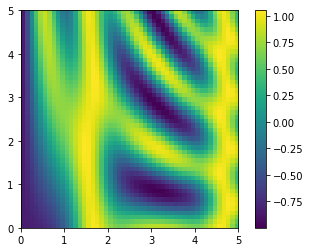

In [37]:
# 2. 画一个二维函数
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
z = np.sin(x)**10 + np.cos(10+y*x)*np.cos(x)

plt.imshow(z,origin="lower",extent=[0,5,0,5],cmap='viridis')
plt.colorbar()

## 比较、掩码和布尔逻辑
- 这一节将会介绍如何用布尔掩码来查看和操作NumPy数组中的值。

    - 当你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。
    - 例如你可能希望统计数组中有多少值大于某一个给定值，或者删除所有超出某些门限值的异常点。
    - 在NumPy中，布尔掩码通常是完成这类任务的最高效方式。



In [38]:
# 示列：统计下雨天数

# 假设你有一系列表示某城市一年内日降水量的数据
import numpy as np
import pandas as pd

# 利用Pasdas抽取降雨量，放入一个Numpy数组
rainfall = pd.read_csv("data/Seattle2014.csv")["PRCP"].values
inches = rainfall/254 #1/10mm-> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

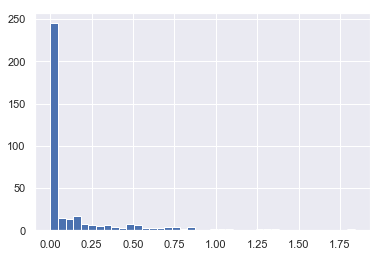

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set() #设置绘图风格

plt.hist(inches,40)

## 数组的6种比较操作

- 和算术运算符一样，比较运算操作在NumPy中也是借助通用函数来实现的。例如当你写x < 3时，NumPy内部会使用np.less(x, 3)。这些比较运算符和其对应的通用函数如下表所示。
 
 
         运算符      对应的函数

           ==          np.equal

           !=          np.not_equal

           <           np.less

           <=          np.less_equal

           >           np.greater

           >=          np.graeter_equal
   
  - 和算术运算通用函数一样，这些比较运算通用函数也可以用于任意形状、大小的数组。

In [10]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x<3
print(y)
print(y.dtype)

[ True  True False False False]
bool


In [11]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x>3
print(y)
print(y.dtype)

[False False False  True  True]
bool


In [6]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x>=3
print(y)
print(y.dtype)

[False False  True  True  True]
bool


In [ ]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x<=3
print(y)
print(y.dtype)

In [7]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x!=3
print(y)
print(y.dtype)

[ True  True False  True  True]
bool


In [8]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x==3
print(y)
print(y.dtype)

[False False  True False False]
bool


In [12]:
import numpy as np
rng = np.random.RandomState(0)
x = rng.randint(10,size = (3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### 操作布尔数组

In [14]:
import numpy as np
rng = np.random.RandomState(0)
x = rng.randint(10,size = (3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
# 1. 统计记录的个数
# 如果需要统计布尔数组中True记录的个数，可以使用np.count_nonzero函数：

# 有多少值小于6
np.count_nonzero(x<6)

8

In [16]:
# 另外一种统计方法是用np.sum，在这个例子中False会被解释成0
# 而True会被解释为1：

np.sum(x<6)

8

In [17]:
# sum()的好处是，和其他NumPy聚合函数一样，这个求和也可以沿着行或列进行：

# 每行有多少个值小于6

np.sum(x<6,axis = 1)

array([4, 2, 2])

In [18]:
# 如要快速检查任意或者所有这些值是否为True，可以用（你一定猜到了）np.any()或np.all()：
# 有没有大于8的值
np.any(x>8)

True

In [19]:
# 是否所有值都大于8
np.all(x>8)

False

In [20]:
# 有没有等于5的值
np.any(x==5)

True

In [22]:
# 是否所有的值都小于10
np.all(x<10)

True

In [24]:
# np.all()和n p.any()也可以用于沿着特定的坐标轴，例如：

np.all(x<8,axis = 1)

# 最后需要提醒的是，正如在2.4节中提到的，Python有内置的sum()、any()和all()函数，
# 这些函数在NumPy中有不同的语法版本。如果在多维数组上混用这两个版本，会导致失败或产生不可预知的错误结果。
# 因此，确保在以上的示例中用的都是np.sum()、np.any()和np.all()函数。

array([ True, False,  True])

#### 布尔运算符
    
    我们已经看到该如何统计所有降水量小于4英寸或者大于2英寸的天数，但是如果我们想统计降水量小于4英寸且大于2英寸的天数该如何操作呢？这可以通过Python的逐位逻辑运算符（bitwise logic operator）&、|、^和~来实现。同标准的算术运算符一样，NumPy用通用函数重载了这些逻辑运算符，这样可以实现数组的逐位运算（通常是布尔运算）。

In [26]:
# 统计降水量小于4英寸且大于2英寸的天数上述可以写为
import numpy as np
import pandas as pd

# 利用Pasdas抽取降雨量，放入一个Numpy数组
rainfall = pd.read_csv("data/Seattle2014.csv")["PRCP"].values
inches = rainfall/254 #1/10mm-> inches
np.sum((inches>0.5)&(inches<1))

29

#### 以下表格总结了逐位的布尔运算符和其对应的通用函数

    -  运算符        对应通用函数

       &             np.bitwise_and

       |             np.bitwise_or

       ^             np.bitwise_xor

       ~             np.bitwise_not

In [29]:
import numpy as np
import pandas as pd

# 利用Pasdas抽取降雨量，放入一个Numpy数组
rainfall = pd.read_csv("data/Seattle2014.csv")["PRCP"].values
inches = rainfall/254 #1/10mm-> inches

print("没有降雨的天数:         ", np.sum(inches == 0))
print("降雨的天数:             ", np.sum(inches != 0))
print("降雨量大于5英寸的天数:  ", np.sum(inches > 0.5))
print("降雨量小于一英寸的天数 :", np.sum((inches > 0) &
                                                (inches < 0.2)))

没有降雨的天数:          215
降雨的天数:              150
降雨量大于5英寸的天数:   37
降雨量小于一英寸的天数 : 75


In [30]:
# 将布尔数组作为掩码

import numpy as np
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [31]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [32]:
#现在为了将这些值从数组中选出，可以进行简单的索引，即掩码操作：
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [34]:
import numpy as np
import pandas as pd

# 利用Pasdas抽取降雨量，放入一个Numpy数组
rainfall = pd.read_csv("data/Seattle2014.csv")["PRCP"].values
inches = rainfall/254 #1/10mm-> inches

# 为所有下雨天创建一个掩码 
rainy =(inches>0)

# 构建一个包含整个夏季日期的掩码
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precip on rainy days in 2014 (inches):   ",np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


## 逻辑运算符的区别
    
    使用关键字and/or与使用逻辑操作运算符&/|
    人们经常困惑于关键字and和or，以及逻辑操作运算符&和|的区别是什么，什么时候该选择哪一种？
    它们的区别是：and和or判断整个对象是真或假，而&和|是指每个对象中的比特位。
    当你使用and或or时，就等于让Python将这个对象当作整个布尔实体。在Python中，所有非零的整数都会被当作是True：
    当你对整数使用&和|时，表达式操作的是元素的比特，将and或or应用于组成该数字的每个比特
    
    请注意，&和|运算时，对应的二进制比特位进行比较以得到最终结果。
    当你在NumPy中有一个布尔数组时，该数组可以被当作是由比特字符组成的，其中1 = True、0 = False。这样的数组可以用上面介绍的方式进行&和|的操作：

In [35]:
bool(42),bool(0)

(True, False)

In [36]:
bool(42 and 0)

False

In [37]:
bool(40 or 0)

True

In [38]:
# 当你对整数使用&和|时，表达式操作的是元素的比特，将and或or应用于组成该数字的每个比特
bin(42)

'0b101010'

In [39]:
bin(59)

'0b111011'

In [40]:
bin(42&59)

'0b101010'

In [41]:
bin(42|59)

'0b111011'

In [43]:
# 当你在NumPy中有一个布尔数组时，该数组可以被当作是由比特字符组成的，其中1 = True、0 = False。这样的数组可以用上面介绍的方式进行&和|的操作：

A = np.array([1,0,1,0,1,0],dtype=bool)
B = np.array([1,1,1,0,1,1],dtype=bool)
A|B

array([ True,  True,  True, False,  True,  True])

In [45]:
# 同样，对给定数组进行逻辑运算时，你也应该使用|或&，而不是or或and：

x = np.arange(10)
(x>4) &(x<8)

# 因此可以记住：and和or对整个对象执行单个布尔运算，
# 而&和|对一个对象的内容（单个比特或字节）执行多个布尔运算。对于NumPy布尔数组，后者是常用的操作。

array([False, False, False, False, False,  True,  True,  True, False,
       False])